# **1.Objective of the Proposed Research:**
The banks, credit unions and insurance company profits from the interest their customers pay. The lender needs to know whether it is a risk to lend money to borrowers. \

Company needs to run an automated loan eligibility process based on customers’ information when they fill out an online application. This way, the company could estimate the amount they are willing to give loan to and then better target the customers. Furthermore, they could minimize the risk of potential loss.

This research finds out the how the portfolio of the applicants look like and how we could divide applicants into groups to classify their ability to repay. 


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data=pd.read_csv("train_u6lujuX_CVtuZ9i(1).csv")

# **2.Data Exploration:**

1. There are 13 columns(features) and 614 rows. 8 object, 4 folat64 and 1 integer.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


2. Dataset Description:
We can see more clearly with the table below of each variables what they represent in details.

**Dataset Description:**

<table>
<tr>
   <th>Variable</th>
   <th>Description</th>
</tr>
<tr>
    <td>Loan_ID</td>
    <td>Loan_ID</td>
</tr>
<tr>    
    <td>Gender</td>
    <td>Male or Female</td>
</tr>
<tr>
    <td> Married </td>
    <td> Applicant married(Yes / No) </td>
</tr>
<tr>
    <td>Dependents</td>
    <td>0/1/2/ 3+</td>
</tr>
<tr>
    <td>Education</td>
    <td>Applicant Education(Graduate/Under Graduate</td>
</tr>
<tr>
    <td>Self_Employed</td>
    <td>Self_Employee (Yes/ No)</td>
</tr>
<tr>
    <td>ApplicantIcome</td>
    <td>Applicant Monthly Income</td>
</tr>
<tr>
    <td>CoapplicantIncome</td>
    <td>Coapplicant Monthly Income</td>
</tr>
<tr>
    <td>LoanAmount</td>
    <td>Loan Amount in thousands(1,000)</td>
</tr>
<tr>
    <td>Loan_Amount_Term</td>
    <td>Term of loan in months(120,..360)</td>
</tr>
<tr>
    <td>Credit_History</td>
    <td>Credit History Meets requirment(1=Yes, 0=No)</td>
</tr>
<tr>
    <td>Property_Area</td>
    <td>Urban/Rural/Semi Urban</td>
</tr>
<tr>
    <td>Loan_Status</td>
    <td>Loan approved: Y/N</td>



3. These are non-number columns using Yes, No or strings. Some information about the borrowers.

In [ ]:
nonumber_data=data[["Gender","Married","Dependents","Education","Self_Employed","Credit_History","Property_Area","Loan_Status"]]
nonumber_data.head(5)

Gender Married Dependents     Education Self_Employed  Credit_History Property_Area Loan_Status
0   Male      No          0      Graduate            No             1.0         Urban           Y
1   Male     Yes          1      Graduate            No             1.0         Rural           N
2   Male     Yes          0      Graduate           Yes             1.0         Urban           Y
3   Male     Yes          0  Not Graduate            No             1.0         Urban           Y
4   Male      No          0      Graduate            No             1.0         Urban           Y

4. Columns that are with numbers(integer). Financial information about a borrower.

In [ ]:
numbers_data=data[["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"]]
numbers_data.head(5)

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term
0             5849                0.0         NaN             360.0
1             4583             1508.0       128.0             360.0
2             3000                0.0        66.0             360.0
3             2583             2358.0       120.0             360.0
4             6000                0.0       141.0             360.0

# **3. Data Cleaning:**

We drop unwanted columns"Gender" and Loan_ID" and all the empty and NA cells.

In [ ]:
df1=data.drop(["Gender","Loan_ID"],axis=1)
df2=df1[df1.Married.notnull()]
df3=df2[df2.Dependents.notnull()]
df4=df3[df3.Education.notnull()]
df5=df4[df4.Self_Employed.notnull()]
df6=df5[df5.ApplicantIncome.notnull()]
df7=df6[df6.CoapplicantIncome.notnull()]
df8=df7[df7.LoanAmount.notnull()]
df9=df8[df8.Loan_Amount_Term.notnull()]
df10=df9[df9.Credit_History.notnull()]
df11=df10[df10.Property_Area.notnull()]
df12=df11[df11.Loan_Status.notnull()]
ndata=data.dropna()
ndata.head(10)

Loan_ID Gender Married Dependents     Education Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History Property_Area Loan_Status
1   LP001003   Male     Yes          1      Graduate            No             4583             1508.0       128.0             360.0             1.0         Rural           N
2   LP001005   Male     Yes          0      Graduate           Yes             3000                0.0        66.0             360.0             1.0         Urban           Y
3   LP001006   Male     Yes          0  Not Graduate            No             2583             2358.0       120.0             360.0             1.0         Urban           Y
4   LP001008   Male      No          0      Graduate            No             6000                0.0       141.0             360.0             1.0         Urban           Y
5   LP001011   Male     Yes          2      Graduate           Yes             5417             4196.0       267.0             360.0             1.0         Urban           Y
6   LP001013   Male     Yes          0  Not Graduate            No             2333             1516.0        95.0             360.0             1.0         Urban           Y
7   LP001014   Male     Yes         3+      Graduate            No             3036             2504.0       158.0             360.0             0.0     Semiurban           N
8   LP001018   Male     Yes          2      Graduate            No             4006             1526.0       168.0             360.0             1.0         Urban           Y
9   LP001020   Male     Yes          1      Graduate            No            12841            10968.0       349.0             360.0             1.0     Semiurban           N
10  LP001024   Male     Yes          2      Graduate            No             3200              700.0        70.0             360.0             1.0         Urban           Y

There are 480 rows left after data cleaning.

In [ ]:
ndata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB


# **4. Adaptation:** 
Create at least two additional columns:


1.   Add Applicant Income and Coapplicant Income to be Total Income




In [ ]:
ndata["Total_Income"]=ndata["ApplicantIncome"]+ndata["CoapplicantIncome"]
print(ndata.head(5))

    Loan_ID Gender Married Dependents     Education Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History Property_Area Loan_Status  Total_Income
1  LP001003   Male     Yes          1      Graduate            No             4583             1508.0       128.0             360.0             1.0         Rural           N        6091.0
2  LP001005   Male     Yes          0      Graduate           Yes             3000                0.0        66.0             360.0             1.0         Urban           Y        3000.0
3  LP001006   Male     Yes          0  Not Graduate            No             2583             2358.0       120.0             360.0             1.0         Urban           Y        4941.0
4  LP001008   Male      No          0      Graduate            No             6000                0.0       141.0             360.0             1.0         Urban           Y        6000.0
5  LP001011   Male     Yes          2      Graduate         

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


2.   Calculate monthly mortgage payment(without interests) with Loan Amount divide by Loan Amount Term.

In [ ]:
ndata["Monthly_Mortgage_Payment_Without_Interests"]=ndata["LoanAmount"]*(1000)/ndata["Loan_Amount_Term"]
print(ndata.head(5))

    Loan_ID Gender Married Dependents     Education Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History Property_Area Loan_Status  Total_Income  Monthly_Mortgage_Payment_Without_Interests
1  LP001003   Male     Yes          1      Graduate            No             4583             1508.0       128.0             360.0             1.0         Rural           N        6091.0                                  355.555556
2  LP001005   Male     Yes          0      Graduate           Yes             3000                0.0        66.0             360.0             1.0         Urban           Y        3000.0                                  183.333333
3  LP001006   Male     Yes          0  Not Graduate            No             2583             2358.0       120.0             360.0             1.0         Urban           Y        4941.0                                  333.333333
4  LP001008   Male      No          0      Graduate            No       

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
add_data=ndata[["ApplicantIncome","CoapplicantIncome","LoanAmount","Total_Income","Monthly_Mortgage_Payment_Without_Interests"]]
print(add_data.head(5))

   ApplicantIncome  CoapplicantIncome  LoanAmount  Total_Income  Monthly_Mortgage_Payment_Without_Interests
1             4583             1508.0       128.0        6091.0                                  355.555556
2             3000                0.0        66.0        3000.0                                  183.333333
3             2583             2358.0       120.0        4941.0                                  333.333333
4             6000                0.0       141.0        6000.0                                  391.666667
5             5417             4196.0       267.0        9613.0                                  741.666667


3. Select columns that matter financially for a person or a family. How much they earn and spend a month with the total debt they have. 

In [ ]:
number_data=ndata[["ApplicantIncome","CoapplicantIncome","LoanAmount","Monthly_Mortgage_Payment_Without_Interests"]]
number_data.head(5)

ApplicantIncome  CoapplicantIncome  LoanAmount  Monthly_Mortgage_Payment_Without_Interests
1             4583             1508.0       128.0                                  355.555556
2             3000                0.0        66.0                                  183.333333
3             2583             2358.0       120.0                                  333.333333
4             6000                0.0       141.0                                  391.666667
5             5417             4196.0       267.0                                  741.666667

# **5. Descriptive Static Visualization:**


1. Pie plot shows the married and not married applicants ratio.

In [ ]:
married=ndata["Married"].value_counts()
married

Yes    311
No     169
Name: Married, dtype: int64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """


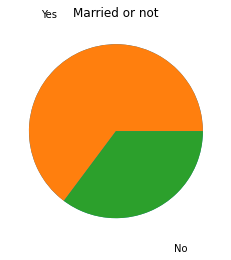

In [ ]:
import matplotlib.pyplot as plt
names="Yes","No"
values=[married]
plt.pie(2)
plt.pie(values, labels=names, labeldistance=1.5);
plt.title("Married or not")
plt.show()

2. The relationship of Total income and loan amount

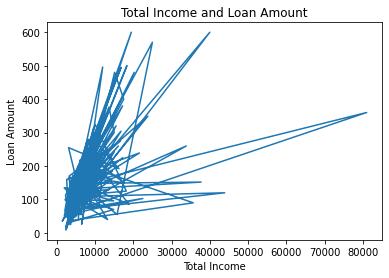

In [ ]:
import seaborn as sns

df=pd.DataFrame({'Total_Income': ndata.Total_Income, 'Loan_Amount': ndata.LoanAmount })
plt.plot( 'Total_Income', 'Loan_Amount', data=df)
plt.xlabel("Total Income")
plt.ylabel("Loan Amount")
plt.title("Total Income and Loan Amount")
plt.show()

3.We can see qualified credit score applicants' income level (1 is qualified, 0 is not).There is not much correlation with these two factors.

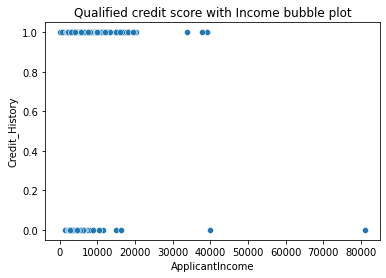

In [ ]:
data =ndata.loc[ndata.Credit_History == 1]
sns.scatterplot(data=ndata, x="ApplicantIncome", y="Credit_History", legend=False, sizes=(20, 50))
plt.title("Qualified credit score with Income bubble plot")
plt.show()

4. Applicants' education background. There are more people has graduated background than under-graduated people.

In [ ]:
ndata['Education'].value_counts()

Graduate        383
Not Graduate     97
Name: Education, dtype: int64

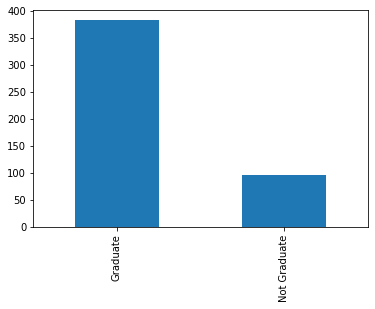

In [ ]:
ndata['Education'].value_counts().plot(kind='bar')

5. Applicant Income and Loan Amount

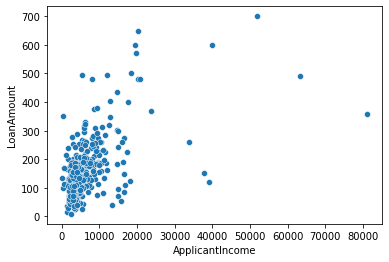

In [ ]:
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', data=df1)

6. Another plot for Applicant Income and Loan Amount

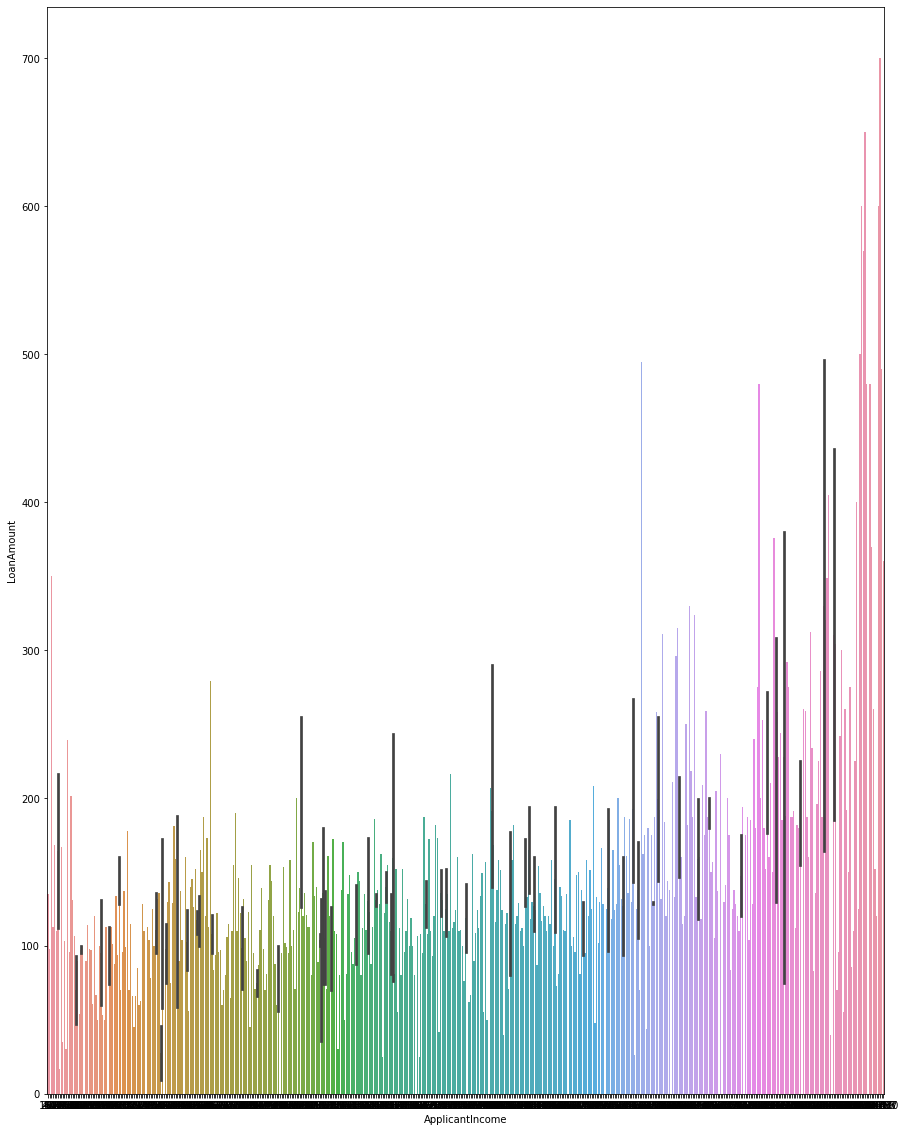

In [ ]:
df1.index
ax=plt.figure(figsize=(15,20))
ax = sns.barplot(x=df1["ApplicantIncome"],y=df1["LoanAmount"])

7. Lineplot for Total income vs LoanAmount

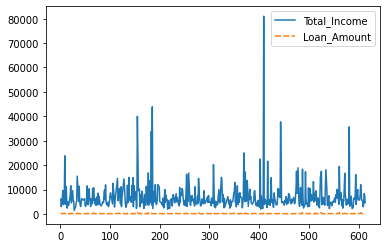

In [ ]:
sns.lineplot(data=df)

8. Applicant Income 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


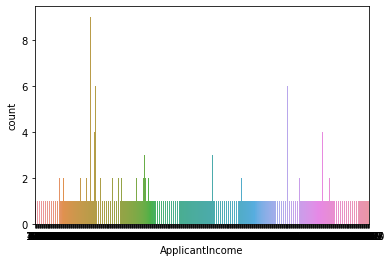

In [ ]:
sns.countplot(df1['ApplicantIncome'])

9. Pair Plot\
Most people's loan amounts are around $100 dollars.

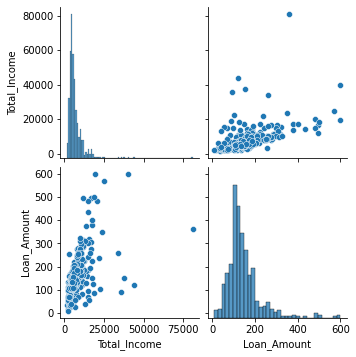

In [ ]:
sns.pairplot(df)

#**6. Hierarchical Clustering**



In [ ]:
choose_data=ndata[["Total_Income","LoanAmount","Monthly_Mortgage_Payment_Without_Interests"]]
choose_data

Total_Income  LoanAmount  Monthly_Mortgage_Payment_Without_Interests
1          6091.0       128.0                                  355.555556
2          3000.0        66.0                                  183.333333
3          4941.0       120.0                                  333.333333
4          6000.0       141.0                                  391.666667
5          9613.0       267.0                                  741.666667
..            ...         ...                                         ...
609        2900.0        71.0                                  197.222222
610        4106.0        40.0                                  222.222222
611        8312.0       253.0                                  702.777778
612        7583.0       187.0                                  519.444444
613        4583.0       133.0                                  369.444444

[480 rows x 3 columns]

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, leaves_list
import pandas as pd
import numpy as np
from pandas import DataFrame

pd.set_option('display.notebook_repr_html',False)
pd.set_option('display.max_rows',60)
pd.set_option('display.width',1000)
%matplotlib inline

Most applicants' total Income is around or less than $5000.(This is the amount of the whole family income)

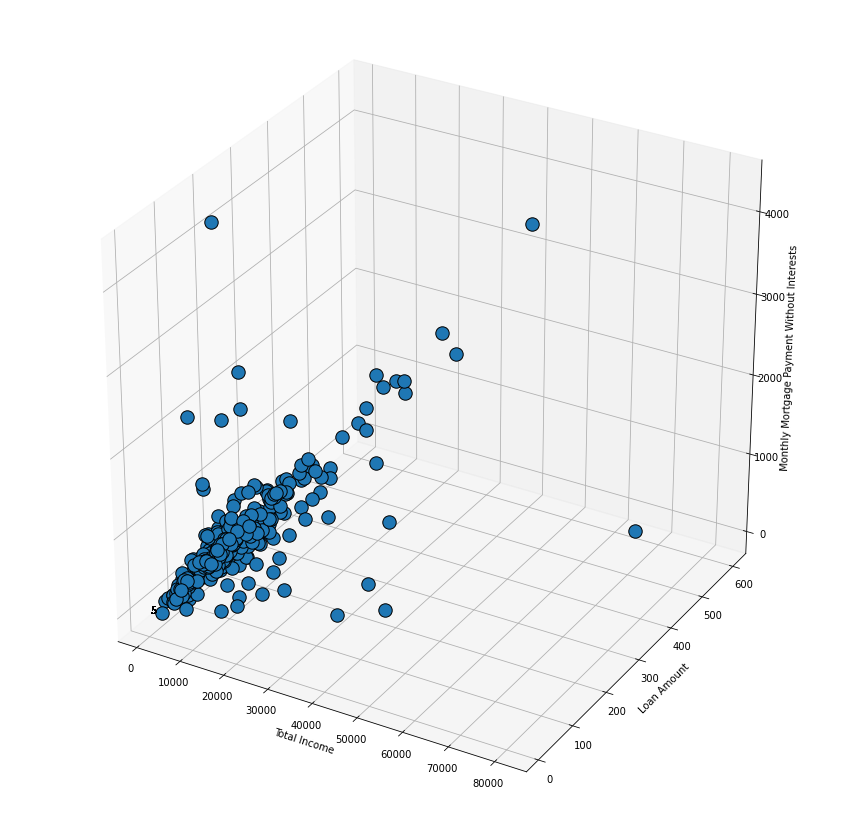

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(15,15))
ax=fig.add_subplot(111,projection='3d')

ax.scatter(xs=choose_data.Total_Income, ys=choose_data.LoanAmount, zs= choose_data.Monthly_Mortgage_Payment_Without_Interests, s=180, edgecolor= 'black',depthshade=False)
for name,totalIncome,loanAmount,mortgage in choose_data[['Total_Income','LoanAmount','Monthly_Mortgage_Payment_Without_Interests']].itertuples(index=True, name=None):
  ax.text(2,4.5, 3, 5)
ax.set_xlabel('Total Income')
ax.set_ylabel('Loan Amount')
ax.set_zlabel('Monthly Mortgage Payment Without Interests')

plt.show()

#**7. Dendrogram**

We choose the middle 20 percent of people in the applicants\
Narrowing down the data to the center in order to find a more stable data. We select total income between 40 percentile to 60 percentile to see the grouping

In [ ]:
test_data=ndata[["Total_Income","LoanAmount","Monthly_Mortgage_Payment_Without_Interests"]]
test_data

Total_Income  LoanAmount  Monthly_Mortgage_Payment_Without_Interests
1          6091.0       128.0                                  355.555556
2          3000.0        66.0                                  183.333333
3          4941.0       120.0                                  333.333333
4          6000.0       141.0                                  391.666667
5          9613.0       267.0                                  741.666667
..            ...         ...                                         ...
609        2900.0        71.0                                  197.222222
610        4106.0        40.0                                  222.222222
611        8312.0       253.0                                  702.777778
612        7583.0       187.0                                  519.444444
613        4583.0       133.0                                  369.444444

[480 rows x 3 columns]

In [ ]:
np.percentile([test_data.Total_Income],40)

4786.6

In [ ]:
np.percentile([test_data.Total_Income],60)

6087.4

In [ ]:
select_data=test_data[test_data.Total_Income>4786.6][test_data.Total_Income<=6087.4]
select_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Total_Income  LoanAmount  Monthly_Mortgage_Payment_Without_Interests
3          4941.0       120.0                                  333.333333
4          6000.0       141.0                                  391.666667
7          5540.0       158.0                                  438.888889
8          5532.0       168.0                                  466.666667
15         4950.0       125.0                                  347.222222
..            ...         ...                                         ...
599        5780.0       192.0                                  533.333333
602        5703.0       128.0                                  355.555556
606        5900.0       173.0                                  480.555556
607        5398.0       157.0                                  436.111111
608        5182.0       108.0                                  300.000000

[96 rows x 3 columns]

#7. Dendrogram

Using 'average'

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
select_data=DataFrame(euclidean_distances(select_data))
select_data.astype(int)

0     1    2    3     4     5    6    7    8    9   ...   86   87   88    89    90   91   92   93   94   95
0      0  1060  609  607    17    66  111  326  226  198  ...  959  292  298  1027  1183  865  762  971  469  243
1   1060     0  462  474  1051  1113  949  739  836  874  ...  113  777  843    96   466  266  299  137  603  823
2    609   462    0   30   597   657  499  308  394  416  ...  374  348  382   450   621  260  185  362  142  387
3    607   474   30    0   595   653  498  316  398  412  ...  391  356  368   468   608  257  207  368  137  392
4     17  1051  597  595     0    67  102  319  219  184  ...  950  286  281  1018  1168  853  753  960  457  237
..   ...   ...  ...  ...   ...   ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...  ...  ...  ...  ...  ...
91   865   266  260  257   853   909  756  568  654  669  ...  236  608  613   306   389    0  204  132  395  647
92   762   299  185  207   753   816  651  440  537  578  ...  197  478  562   270   585  204    0  237  316  524
93   971   137  362  368   960  1019  861  660  753  778  ...  147  700  734   198   388  132  237    0  504  743
94   469   603  142  137   457   515  361  191  263  274  ...  511  229  246   586   734  395  316  504    0  259
95   243   823  387  392   237   304  136   84   23  120  ...  719   49  230   786   992  647  524  743  259    0

[96 rows x 96 columns]

There are 3 main groups(almost 4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


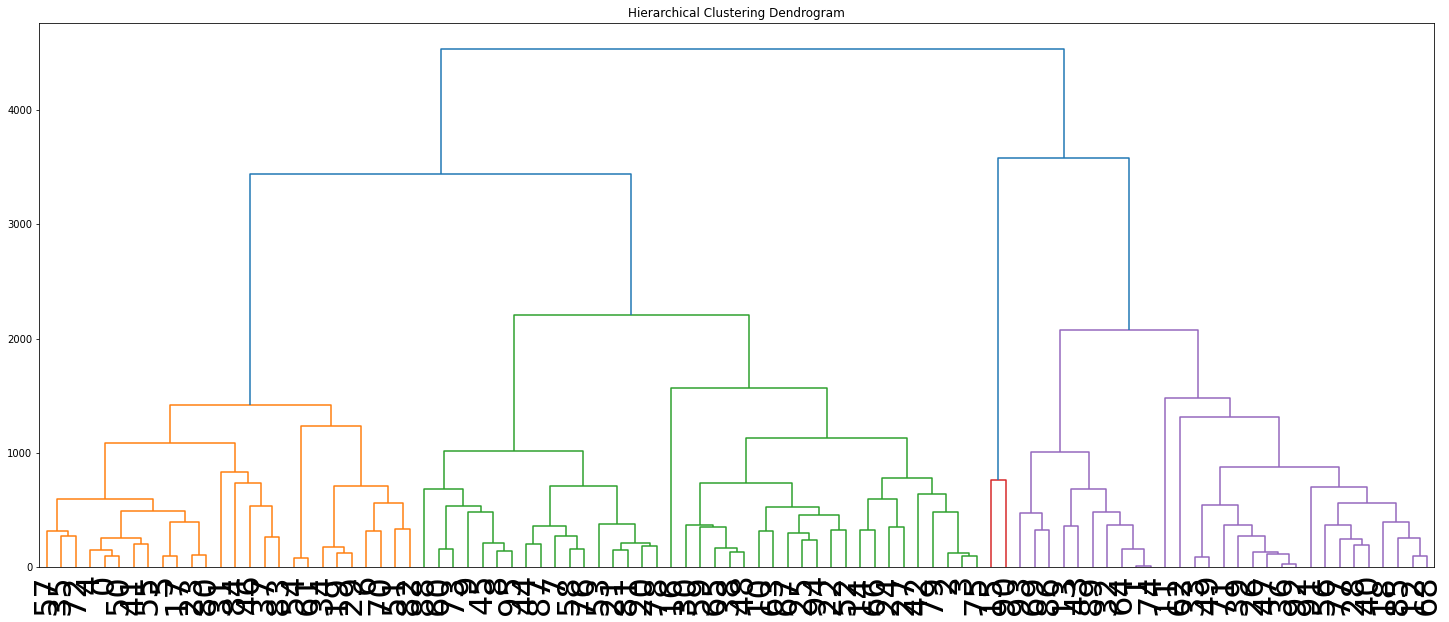

In [ ]:
Z=linkage(select_data,'average')
plt.figure(figsize=(25,10))
plt.title('Hierarchical Clustering Dendrogram')
dendrogram(Z,leaf_font_size=32)
plt.show()

In [ ]:
Z[0]

array([ 1.        , 74.        ,  9.90209431,  2.        ])

In [ ]:
Z[1]

array([36.        , 92.        , 24.74811967,  2.        ])

In [ ]:
Z

In [ ]:
leaves_list(Z)

array([57, 35, 72,  4,  0, 50, 41, 55,  5, 17, 23, 80, 31, 84, 46, 37, 83,
       54, 61, 34, 19, 29,  6, 70, 51, 82, 88, 60, 73,  9, 45,  8, 95, 44,
       87,  7, 58, 76, 53, 21, 81, 20, 78, 16, 30, 59, 65, 38, 48, 10, 63,
       67, 25, 94, 22, 52, 14, 66, 24, 27, 42, 79,  2,  3, 75, 15, 90, 93,
       69, 86, 13, 43, 89, 32, 64,  1, 74, 11, 62, 33, 49, 71, 39, 26, 47,
       36, 92, 91, 56, 77, 28, 40, 18, 85, 12, 68], dtype=int32)

#7.Dendrogram

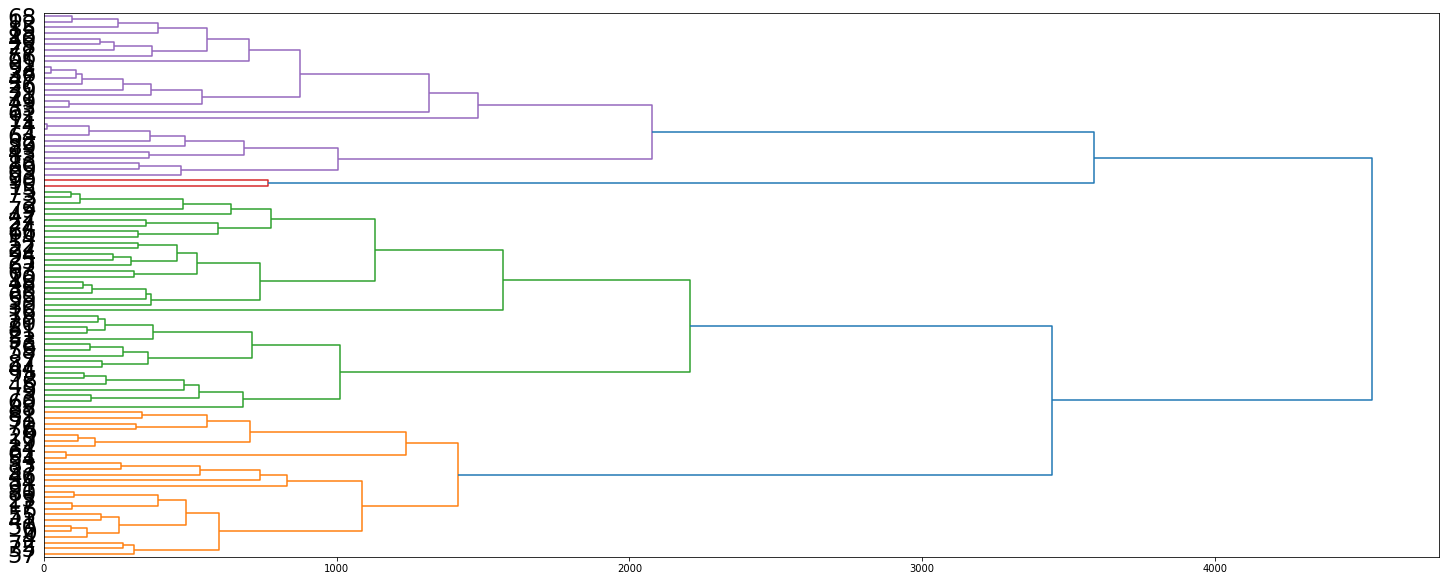

In [ ]:
plt.figure(figsize=(25,10))
D=dendrogram(Z=Z, orientation='right', leaf_font_size=23,
             labels= select_data.index)

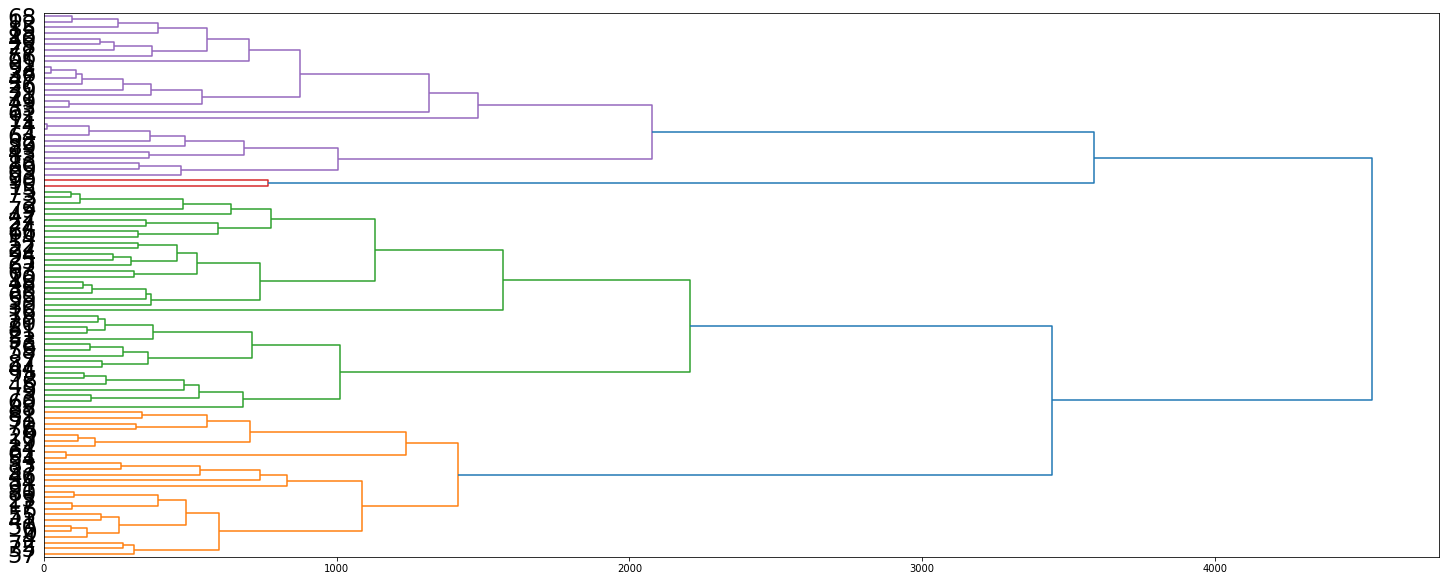

In [ ]:
plt.figure(figsize=(25,10))
D=dendrogram(Z=Z, orientation='right', leaf_font_size=23,
             labels= select_data.index)

#**8. KMeans fitting**



In [ ]:
from sklearn.cluster import KMeans
k=3
model= KMeans(n_clusters=k)
model.fit(test_data[["Total_Income","LoanAmount","Monthly_Mortgage_Payment_Without_Interests"]])
model.labels_

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 2, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 2, 0, 2, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,

#8. KMeans Plotting

Here, 3 groups are easily defined: 
 

*   Yellow means total income is less than around 5000 dollars, \
*   Blue means total income is between 5000 dollars to 20,000 dollars.\
*   Red means total income is more than 20,000 dollars.





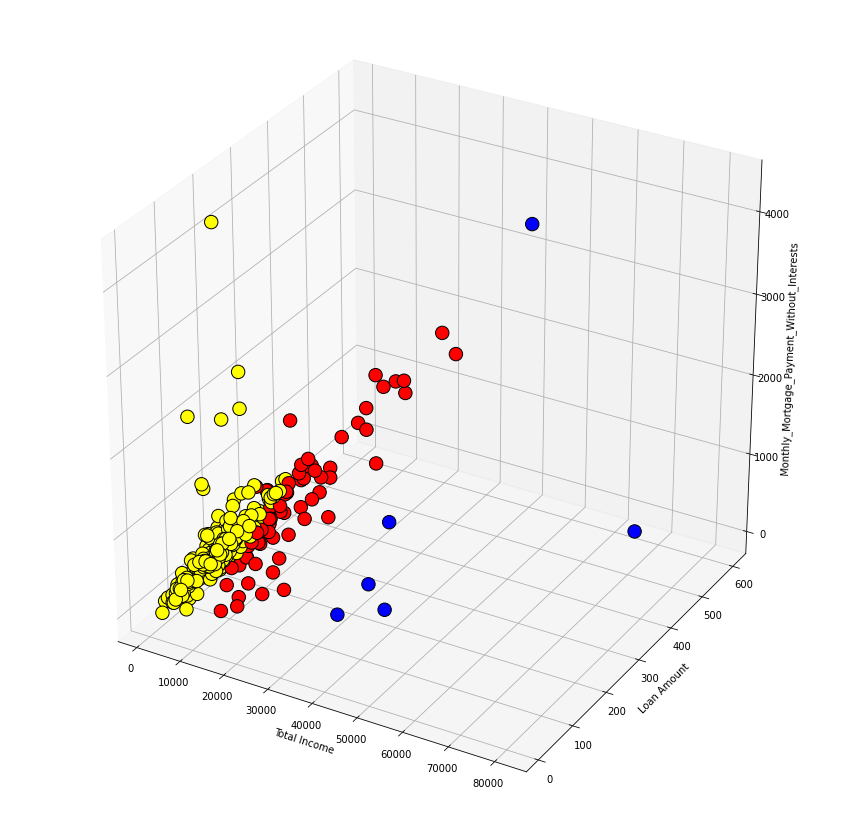

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
colormap= np.array(['yellow','red','blue'])


fig=plt.figure(figsize=(15,15))
ax=fig.add_subplot(111,projection='3d')

ax.scatter(xs= test_data.Total_Income, ys=test_data.LoanAmount, zs=test_data.Monthly_Mortgage_Payment_Without_Interests,
           s=180, edgecolor ='black', depthshade =False, c=colormap[model.labels_])



ax.set_xlabel('Total Income')
ax.set_ylabel('Loan Amount')
ax.set_zlabel('Monthly_Mortgage_Payment_Without_Interests')
plt.show()

#**9.sklearn.cluster**

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, leaves_list
k_means=KMeans(n_clusters=2)
k_means.fit(number_data)

KMeans(n_clusters=2)

In [ ]:
target_labels=k_means.predict(number_data)
target_labels=pd.Series(target_labels)
df=pd.merge(number_data, pd.DataFrame(target_labels),left_index=True,right_index=True)

#From unsupervised to supervised learning
Building the decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import six
import sys
sys.modules['sklearn.externals.six'] = six
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
from sklearn import tree

In [ ]:
df['fraud']=df[0]
df=df.drop([0],axis=1)

In [ ]:
features=df.drop('fraud',axis=1).values
target=df['fraud'].values
dt_classifier=DecisionTreeClassifier(criterion ='gini', random_state=42)
dt_classifier.fit(features,target)

DecisionTreeClassifier(random_state=42)

#Decision Tree

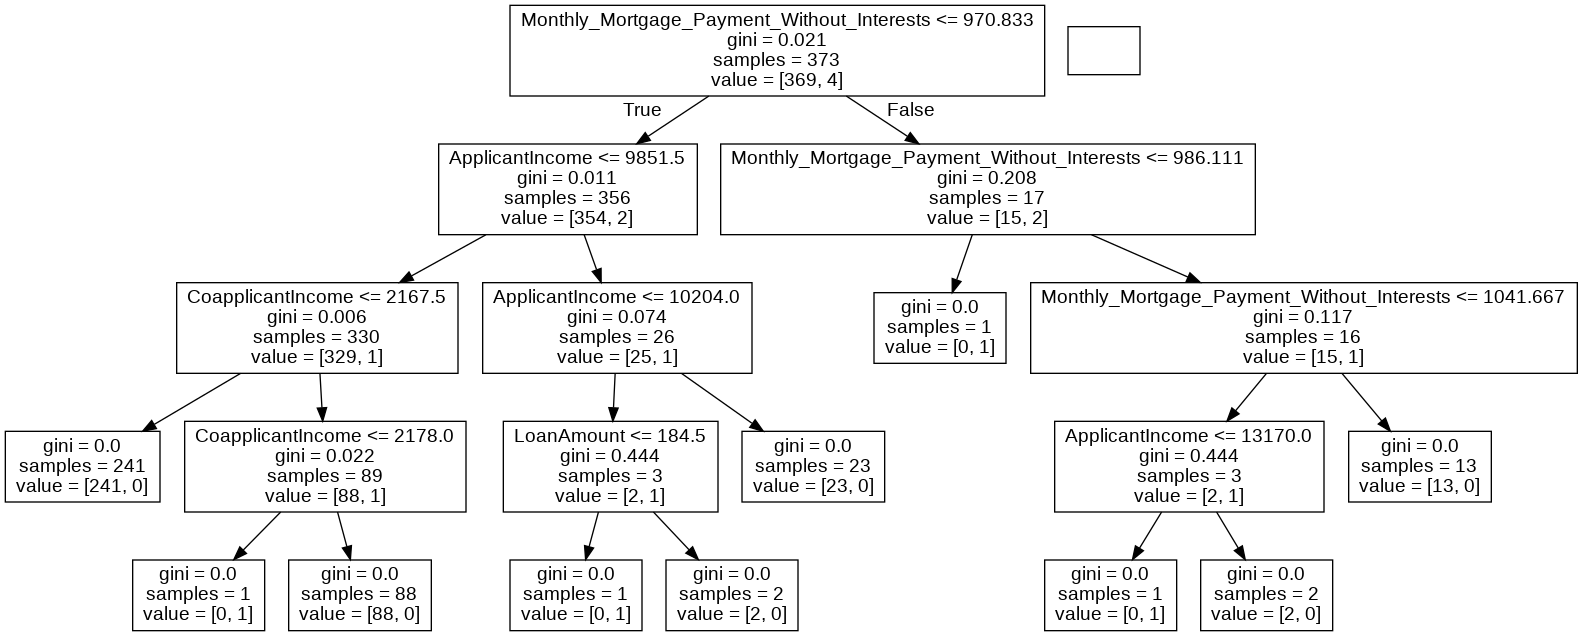

In [ ]:
features=df.drop('fraud',axis=1)
dot_data=tree.export_graphviz(dt_classifier, out_file=None, feature_names=features.columns)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# **10.kNN Function**

In [ ]:
predict=ndata[["ApplicantIncome","LoanAmount","Loan_Status"]].copy(deep=True)
predict['Loan_Status']=predict['Loan_Status'].map(dict(Y=1,N=0))
predict

ApplicantIncome  LoanAmount  Loan_Status
1               4583       128.0            0
2               3000        66.0            1
3               2583       120.0            1
4               6000       141.0            1
5               5417       267.0            1
..               ...         ...          ...
609             2900        71.0            1
610             4106        40.0            1
611             8072       253.0            1
612             7583       187.0            1
613             4583       133.0            0

[480 rows x 3 columns]

In [ ]:
predict['LoanAmount'] = predict['LoanAmount'].astype(int)
predict['Loan_Status']=predict['Loan_Status'].astype(int)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors= 5,
                          p=2)
knn.fit(predict[["ApplicantIncome","LoanAmount"]],
        predict.Loan_Status)

KNeighborsClassifier()

Data visualization

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


Text(0, 0.5, 'Loan Amount')

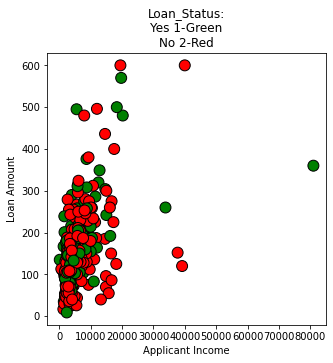

In [ ]:
fig=plt.figure(figsize=(5,5))

colormap= np.array(['green','red'])

plt.scatter(predict.ApplicantIncome,predict.LoanAmount,
            c=colormap[predict.Loan_Status],edgecolor='black', s=120)
plt.title('Loan_Status:\nYes 1-Green\nNo 2-Red')
ax=fig.add_subplot(111)
ax.set_xlabel('Applicant Income')
ax.set_ylabel('Loan Amount')

#Prediction Mesh

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


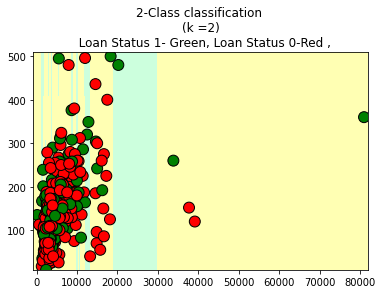

In [ ]:
from matplotlib.pylab import imshow
from matplotlib.colors import ListedColormap
def plotMesh():
  h=100
  cmap_light=ListedColormap(['#ccffdd','#ffffb3'])
  colormap=np.array(['green','red'])
 

  x_min, x_max= predict.ApplicantIncome.min()-1000, predict.ApplicantIncome.max()+1000
  y_min, y_max= predict.LoanAmount.min(),predict.LoanAmount.max()
  n=50
  xx, yy =np.meshgrid(np.arange(x_min ,x_max, h), np.arange(y_min, y_max, h))
  ZZ=knn.predict(np.c_[xx.ravel(),yy.ravel()])

  ZZ=ZZ.reshape(xx.shape)
  fig=plt.figure()
  plt.pcolormesh(xx,yy,ZZ, cmap =cmap_light)

  plt.scatter(predict.ApplicantIncome,predict.LoanAmount, c= colormap[predict.Loan_Status], edgecolor= 'black',
              s=120)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())
  plt.title("2-Class classification \n(k =%i)\n\
  Loan Status 1- Green, Loan Status 0-Red ," % (2))
  ax.set_xlabel("Applicant Income")
  ax.set_ylabel("LoanAmount")
plotMesh()

kNN Algorithm

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors= 5,
                         p =2)
knn.fit(predict[['ApplicantIncome','LoanAmount']],
        predict.Loan_Status)

KNeighborsClassifier()

#Prediction


ApplicantIncome: 5000
LoanAmount: 300


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


Prediction: loan # 1 Green


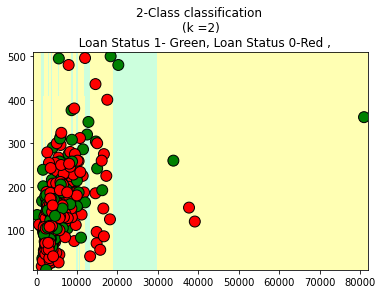

In [ ]:
applicantIncome =int(input('ApplicantIncome: '))
loanAmount =int(input('LoanAmount: '))
data_class =knn.predict(np.array([applicantIncome,loanAmount]).reshape(1,-1))[0]
class_name=["Red","Green"]
print('Prediction: loan #', data_class, class_name[data_class])

predict.loc[len(predict)]=[applicantIncome,loanAmount,data_class]
knn.fit(predict[['ApplicantIncome',"LoanAmount"]], predict.Loan_Status)
plotMesh()

#**11. Project Report**



**Applicants’ profile overview:**

There are married 311 verses not married 169 applicants. There are more people who have a graduate background than non-graduated people. We select the columns that matter financially to a person or a family about how much they earn and spend a month as well as the total debt they have to do the analysis. The relationship of Total income and loan amount is a positive correlation.

We can see qualified credit score applicants' income level (1 is qualified, 0 is not). There is not much correlation with these two factors. Most people's loan amounts are around 100 dollars. 

We also choose "Total_Income","LoanAmount","Monthly Mortgage Payment Without Interests" to do the clustering.
Most applicants' total Income is around or less than 5000 dollars.(This is the amount of the whole family income)

**Explanation of  the clusterings:**
We choose the middle 20 percent of people in the applicants. For better grouping, we select the group of total income between 40 percentile to 60 percentile to see the grouping with dendrogram.
 
The **dendrogram** can see clearly that there are 3 main groups(almost 4). We keep using KMeans plotting to find the 3 groups.
Here, 3 groups are easily defined: 
 
*   Yellow means total income is less than around 5000 dollars, 
*   Blue means total income is between 5000 dollars to 20,000 dollars.
*   Red means total income is more than 20,000 dollars.
 
From the **decision tree**, we can see that applicants’ income less than $9852 dollars and with co applicants' income less than 2178 dollars have the biggest group.

The applicants which have been approved loan shows in green and are grouping closely to those who have not been approved. There is no distinct line between those applicants.

The **prediction function** takes the Applicant’s income and loan amount to decide whether the online system will approve the mortgage loan according to the information he/she enters.
For example, applicants enter 5000 dollars for monthly income, and loan amounts of $200 dollars. Then the system will decide whether it shows green (Yes) or red(No) to the applicant.

The result might be surprising that even if you have a higher income and moderate loan amount, you might not get approved for the loan. The people who are at average income with co-applicants who also have income tend to have loans approved due to stable income.

**Originality**\
No other similar published works for linear regression found with same dataset